<a href="https://colab.research.google.com/github/nagarwal52/CounterfactualBounds/blob/main/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import random
from counterfactualbounds import *

### **0:Generate Data**

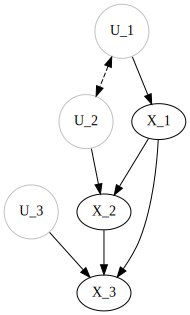

In [8]:
data = {'X_1': np.random.randint(0,2,1000), 'X_2': np.random.randint(0,2,1000),'X_3': np.random.randint(0,2,1000)}
edges= [("X_1", "X_2"),('X_2','X_3'),('X_1','X_3')]
latent_edges = [('X_1','X_2')]
example = CounterfactualBounds(data, edges, latent_edges)
example.draw()

## **1: Response function formulation**

$$\{x_i=m_i(r_i,\textbf{pa}_i)\}_{i=1}^{n}$$ where $n$ is number of nodes/features

In [9]:
_,response_function_dict,_ =example.RF_formulation()
response_function_dict

{'X_1': 2, 'X_2': 4, 'X_3': 16}

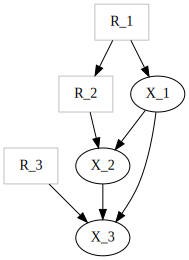

In [10]:
example.RF_graph()

### **2: Creating Q matrix**

$$\textbf{p}=\sum_{\textbf{r}}\textbf{q}_\textbf{r}I\{x_i=m_i(\textbf{pa}_i,r_i)\}$$

**Shape of Q**: (Possible observed states, Total number of response functions)

In [11]:
Q = example.Q_matrix()
Q.shape

(8, 128)

### **3&4: Obtaining the objective function & Optimisation**

In [ ]:
example.bounds('full')

+-----------------+--------------------------+---------------------+--------------------+----------------------------------------------------+
| Intervened node | Factual observation (xF) |     Lower Bound     |    Upper Bound     |                      Decision                      |
+-----------------+--------------------------+---------------------+--------------------+----------------------------------------------------+
| X_1(do(theta=1) |        [0, 1, 0]         |  0.1281624286726951 | 0.9972432148580604 | Informative bound but not certain about the action |
+-----------------+--------------------------+---------------------+--------------------+----------------------------------------------------+
| X_1(do(theta=1) |        [0, 1, 1]         | 0.12816242367809333 | 0.9972432210867762 | Informative bound but not certain about the action |
+-----------------+--------------------------+---------------------+--------------------+----------------------------------------------------+